In [1]:
import os
import tarfile
from six.moves import urllib

In [2]:
import pandas as pd
import numpy as np

def load_housing_data():
    csv_path = "dataset/housing.csv"
    return pd.read_csv(csv_path)

In [3]:
housing = load_housing_data()

In [4]:
housing.head()

longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
0    -122.23     37.88                41.0        880.0           129.0   
1    -122.22     37.86                21.0       7099.0          1106.0   
2    -122.24     37.85                52.0       1467.0           190.0   
3    -122.25     37.85                52.0       1274.0           235.0   
4    -122.25     37.85                52.0       1627.0           280.0   

   population  households  median_income  median_house_value ocean_proximity  
0       322.0       126.0         8.3252            452600.0        NEAR BAY  
1      2401.0      1138.0         8.3014            358500.0        NEAR BAY  
2       496.0       177.0         7.2574            352100.0        NEAR BAY  
3       558.0       219.0         5.6431            341300.0        NEAR BAY  
4       565.0       259.0         3.8462            342200.0        NEAR BAY

In [5]:
#ocean_proximity is categorical attribute
#median_income was scaled

In [6]:
housing['ocean_proximity'].value_counts()

<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: ocean_proximity, dtype: int64

In [7]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
longitude             20640 non-null float64
latitude              20640 non-null float64
housing_median_age    20640 non-null float64
total_rooms           20640 non-null float64
total_bedrooms        20433 non-null float64
population            20640 non-null float64
households            20640 non-null float64
median_income         20640 non-null float64
median_house_value    20640 non-null float64
ocean_proximity       20640 non-null object
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [8]:
#there are missing values in 'total_bedrooms'

In [9]:
housing.describe()

longitude      latitude  housing_median_age   total_rooms  \
count  20640.000000  20640.000000        20640.000000  20640.000000   
mean    -119.569704     35.631861           28.639486   2635.763081   
std        2.003532      2.135952           12.585558   2181.615252   
min     -124.350000     32.540000            1.000000      2.000000   
25%     -121.800000     33.930000           18.000000   1447.750000   
50%     -118.490000     34.260000           29.000000   2127.000000   
75%     -118.010000     37.710000           37.000000   3148.000000   
max     -114.310000     41.950000           52.000000  39320.000000   

       total_bedrooms    population    households  median_income  \
count    20433.000000  20640.000000  20640.000000   20640.000000   
mean       537.870553   1425.476744    499.539680       3.870671   
std        421.385070   1132.462122    382.329753       1.899822   
min          1.000000      3.000000      1.000000       0.499900   
25%        296.000000    787.000000    280.000000       2.563400   
50%        435.000000   1166.000000    409.000000       3.534800   
75%        647.000000   1725.000000    605.000000       4.743250   
max       6445.000000  35682.000000   6082.000000      15.000100   

       median_house_value  
count        20640.000000  
mean        206855.816909  
std         115395.615874  
min          14999.000000  
25%         119600.000000  
50%         179700.000000  
75%         264725.000000  
max         500001.000000

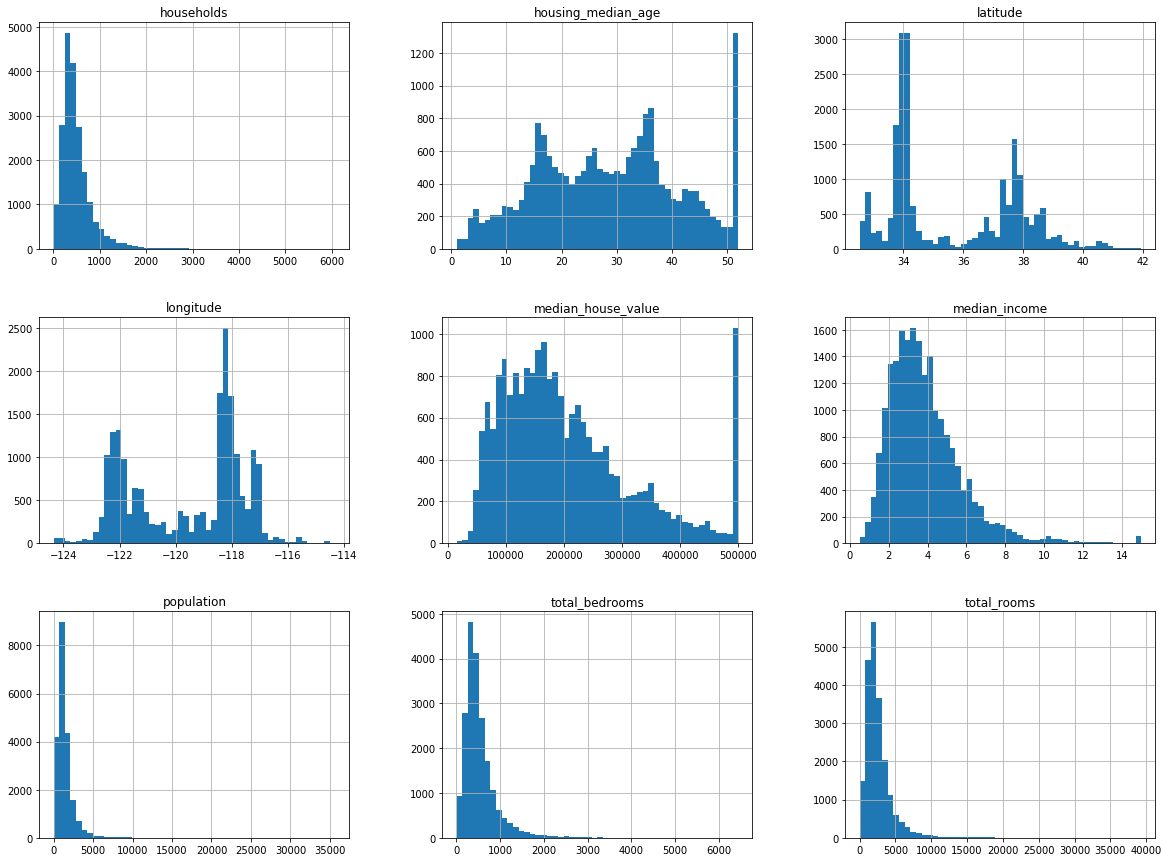

In [10]:
%matplotlib inline 
import matplotlib.pyplot as plt
housing.hist(bins=50, figsize=(20, 15))
plt.show()

In [11]:
#1. median_income was rescaled (0 - 15)
#2. housing_median_age was capped at 50 years
#3. median_house_value was capped at 500,000 usd which 
####may cause learning algorithms to learn this attribute will never go beyond this value(500,000) 
####if client want precise predictions beyond 500,000 this may cause a problem, you have 2 opsions
####3.1 remove all data which have median_house_value more than 500,000
####3.2 collect proper value for those data

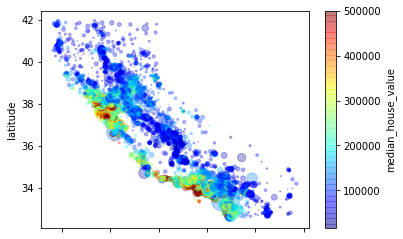

In [12]:
housing.plot(kind='scatter', x='longitude', y='latitude', alpha=0.3, 
              s=housing['population']/100, c='median_house_value', cmap=plt.get_cmap('jet'))

In [13]:
#it looks like houses in coastal areas are more expensive than areas that far from coast

In [14]:
housing['income_cat'] = np.ceil(housing['median_income'] / 1.5)
housing['income_cat'].where(housing['income_cat'] < 5.0, other=5.0, inplace=True)

In [15]:
from sklearn.model_selection import StratifiedShuffleSplit

split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)
for train_index, test_index in split.split(housing, housing['income_cat']):
    train_set = housing.iloc[train_index]
    test_set = housing.iloc[test_index]

In [16]:
for s in (train_set, test_set):
    s.drop(['income_cat'], axis=1, inplace=True)

/Users/80151/anaconda3/lib/python3.6/site-packages/pandas/core/frame.py:3697: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)


In [17]:
corr_matrix = train_set.corr()
corr_matrix['median_house_value'].sort_values(ascending=False)

median_house_value    1.000000
median_income         0.687160
total_rooms           0.135097
housing_median_age    0.114110
households            0.064506
total_bedrooms        0.047689
population           -0.026920
longitude            -0.047432
latitude             -0.142724
Name: median_house_value, dtype: float64

/Users/80151/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:4: FutureWarning: 'pandas.tools.plotting.scatter_matrix' is deprecated, import 'pandas.plotting.scatter_matrix' instead.
  after removing the cwd from sys.path.


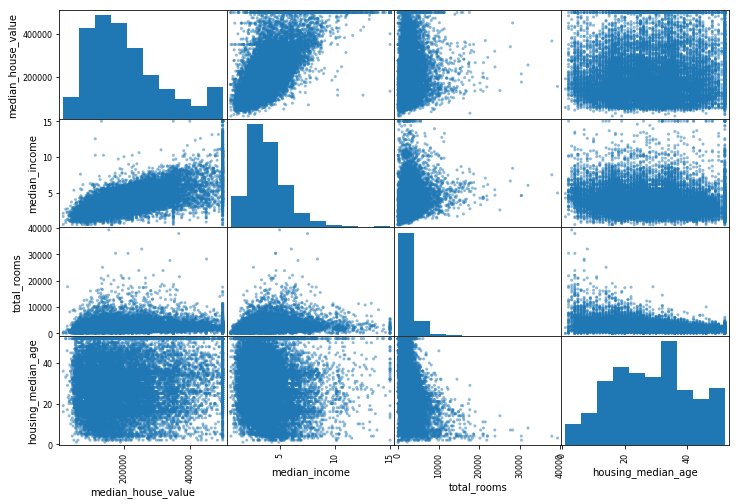

In [18]:
from pandas.tools.plotting import scatter_matrix

attributes = ['median_house_value', 'median_income', 'total_rooms', 'housing_median_age']
scatter_matrix(train_set[attributes], figsize=(12, 8))
plt.show()

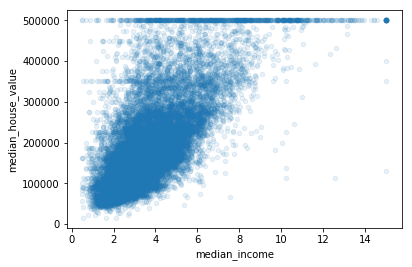

In [19]:
train_set.plot(kind='scatter', x='median_income', y='median_house_value', alpha=0.1)

In [20]:
#you can see that median_house_value are capped at 500,000 350,00 and probably at 280,000

In [21]:
housing = train_set.copy()

In [22]:
housing['rooms_per_household'] = housing['total_rooms'] / housing['households']
housing['bedrooms_per_room'] = housing['total_bedrooms'] / housing['total_rooms']
housing['population_per_household'] = housing['population'] / housing['households']
housing['bedrooms_per_household'] = housing['total_bedrooms'] / housing['households']

In [23]:
housing.corr()['median_house_value'].sort_values(ascending=False)

median_house_value          1.000000
median_income               0.687160
rooms_per_household         0.146285
total_rooms                 0.135097
housing_median_age          0.114110
households                  0.064506
total_bedrooms              0.047689
population_per_household   -0.021985
population                 -0.026920
bedrooms_per_household     -0.043343
longitude                  -0.047432
latitude                   -0.142724
bedrooms_per_room          -0.259984
Name: median_house_value, dtype: float64

In [24]:
housing = train_set.drop(['median_house_value'], axis=1)
housing_label = train_set['median_house_value']

In [25]:
#after explore data, we will process it as following

#1. separate numerical columns from categorical columns 
#2. process numerial columns
####2.1 fill na with median
####2.2 feature engineering(add custom column)
####2.3 feature scaling(add custom column)
#3. process categorical columns
####3.1 fill na
####3.2 one-hot encoding
#4. join both processed numberical and categorical data

In [26]:
from sklearn.base import BaseEstimator, TransformerMixin
total_rooms_ix, total_bedrooms_ix, population_ix, household_ix = 3, 4, 5, 6

class AttributeAdder(BaseEstimator, TransformerMixin):
    def __init__(self, add_bedrooms_per_room = False):
        self.add_bedrooms_per_room = add_bedrooms_per_room
    
    def fit(self, X, y=None):
        return self
    
    def transform(self, X, y=None):
        rooms_per_household = X[:, total_rooms_ix] / X[:, household_ix]
        population_per_household = X[:, population_ix] / X[:, household_ix]
        if self.add_bedrooms_per_room:
            bedrooms_per_room = X[:, total_bedrooms_ix] / X[:, total_rooms_ix]
            return np.c_[X, rooms_per_household, population_per_household, bedrooms_per_room]
        else:
            return np.c_[X, rooms_per_household, population_per_household]

In [27]:
class Selector(BaseEstimator, TransformerMixin):
    def __init__(self, attributes):
        self.attributes = attributes
    
    def fit(self, X, y=None):
        return self
    
    def transform(self, X, y=None):
        return X[self.attributes].values

In [28]:
from sklearn.preprocessing import LabelBinarizer
class LabelBinarizerPipelineFriendly(LabelBinarizer):
    def fit(self, X, y=None):
        """this would allow us to fit the model based on the X input."""
        super(LabelBinarizerPipelineFriendly, self).fit(X)
    def transform(self, X, y=None):
        return super(LabelBinarizerPipelineFriendly, self).transform(X)
    def fit_transform(self, X, y=None):
        return super(LabelBinarizerPipelineFriendly, self).fit(X).transform(X)

In [29]:
from sklearn.pipeline import Pipeline
from sklearn.pipeline import FeatureUnion
from sklearn.preprocessing import Imputer
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelBinarizer

#process numerical attributes
num_attributes = list(housing.drop('ocean_proximity', axis=1))
num_pipeline = Pipeline([
   ('num_selection', Selector(num_attributes)),
   ('fill_median', Imputer(strategy='median')),
   ('attribute_adder', AttributeAdder()),
   ('scaler', StandardScaler()) 
])

#process categorical attributes
cat_attribute = ['ocean_proximity']
cat_pipeline = Pipeline([
    ('cat_selector', Selector(cat_attribute)),
    ('label_binalizer', LabelBinarizerPipelineFriendly())
])

#union processed both categorical and nummerical attributes
full_pipeline = FeatureUnion([
    ('num_pipeline', num_pipeline),
    ('cat_pipeline', cat_pipeline)
])

/Users/80151/anaconda3/lib/python3.6/site-packages/sklearn/utils/deprecation.py:58: DeprecationWarning: Class Imputer is deprecated; Imputer was deprecated in version 0.20 and will be removed in 0.22. Import impute.SimpleImputer from sklearn instead.
  warnings.warn(msg, category=DeprecationWarning)


In [30]:
#prepared train set
housing_prepared = full_pipeline.fit_transform(housing)

In [31]:
#evaluate model
from sklearn.metrics import mean_squared_error

def display_score(y_true, y_pred):
    mse = mean_squared_error(y_true, y_pred)
    return np.sqrt(mse)

#Linear Regression
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()
lin_reg.fit(housing_prepared, housing_label)
lin_pred = lin_reg.predict(housing_prepared)
print("Linear Regression's training error", display_score(housing_label, lin_pred))

Linear Regression's training error 68911.76054233838


In [32]:
#Decision Tree
from sklearn.tree import DecisionTreeRegressor
tree_reg = DecisionTreeRegressor()
tree_reg.fit(housing_prepared, housing_label)
tree_pred = tree_reg.predict(housing_prepared)
print("Decision Tree's training error", display_score(housing_label, tree_pred))

Decision Tree's training error 0.0


In [33]:
#use cross-validation to evaluate model performance
from sklearn.model_selection import cross_val_score
def summary_scores(scores):
    print("scores: ", scores)
    print("mean: ", scores.mean())
    print("Standard deviation: ", scores.std())

lin_scores = cross_val_score(LinearRegression(),
                             housing_prepared,
                             housing_label, 
                             scoring="neg_mean_squared_error",
                             cv=5)

summary_scores(np.sqrt(-lin_scores))

scores:  [67372.33386161 71377.12012377 70035.63165052 66964.20283004
 70278.43771076]
mean:  69205.54523533877
Standard deviation:  1728.5924294123215


In [34]:
tree_scores = cross_val_score(DecisionTreeRegressor(), 
                              housing_prepared, 
                              housing_label,
                              scoring='neg_mean_squared_error',
                              cv=5)
summary_scores(np.sqrt(-tree_scores))

scores:  [68416.08778452 69816.11802339 73977.10279882 70074.08330245
 74341.46829193]
mean:  71324.97204022121
Standard deviation:  2384.785855740114


In [35]:
from sklearn.ensemble import RandomForestRegressor
forest_scores = cross_val_score(RandomForestRegressor(), 
                                housing_prepared,
                                housing_label,
                                scoring='neg_mean_squared_error',
                                cv=5)
summary_scores(np.sqrt(-forest_scores))

/Users/80151/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:248: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/Users/80151/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:248: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/Users/80151/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:248: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/Users/80151/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:248: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/Users/80151/anaconda3/lib/python3.6/site-pa

scores:  [50627.946052   54309.65897785 54116.67172007 51392.87419273
 54124.52696631]
mean:  52914.33558179052
Standard deviation:  1574.7713863620477


In [36]:
#now you have the best model(Random Foreset). let find tune it using GridSearchCV
from sklearn.model_selection import GridSearchCV

param_grid = [
    {'n_estimators': [3, 10, 30], 'max_features': [2, 4, 6, 8]},
    {'bootstrap': [False], 'n_estimators': [3, 10], 'max_features': [2, 3, 4]}
]

forest_reg = RandomForestRegressor()
grid_search = GridSearchCV(forest_reg, param_grid, cv=5, scoring='neg_mean_squared_error',refit=True)
grid_search.fit(housing_prepared, housing_label)

GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators='warn', n_jobs=None,
           oob_score=False, random_state=None, verbose=0, warm_start=False),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid=[{'n_estimators': [3, 10, 30], 'max_features': [2, 4, 6, 8]}, {'bootstrap': [False], 'n_estimators': [3, 10], 'max_features': [2, 3, 4]}],
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='neg_mean_squared_error', verbose=0)

In [37]:
grid_search.best_estimator_

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features=6, max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           n_estimators=30, n_jobs=None, oob_score=False,
           random_state=None, verbose=0, warm_start=False)

In [38]:
grid_search.best_params_

{'max_features': 6, 'n_estimators': 30}

In [39]:
cvres = grid_search.cv_results_
for mean_score, param in zip(cvres['mean_test_score'], cvres['params']):
    print (np.sqrt(-mean_score), param)

63325.2632283935 {'max_features': 2, 'n_estimators': 3}
55271.63358942713 {'max_features': 2, 'n_estimators': 10}
52536.99407933616 {'max_features': 2, 'n_estimators': 30}
60044.27700977814 {'max_features': 4, 'n_estimators': 3}
52561.69718924376 {'max_features': 4, 'n_estimators': 10}
50163.15678918823 {'max_features': 4, 'n_estimators': 30}
59080.2185226644 {'max_features': 6, 'n_estimators': 3}
51752.86412484399 {'max_features': 6, 'n_estimators': 10}
49580.41081259884 {'max_features': 6, 'n_estimators': 30}
58731.88548356098 {'max_features': 8, 'n_estimators': 3}
51884.98904768116 {'max_features': 8, 'n_estimators': 10}
49954.19643620835 {'max_features': 8, 'n_estimators': 30}
60538.46476695813 {'bootstrap': False, 'max_features': 2, 'n_estimators': 3}
54313.76209065908 {'bootstrap': False, 'max_features': 2, 'n_estimators': 10}
60255.87397351981 {'bootstrap': False, 'max_features': 3, 'n_estimators': 3}
52465.6846601497 {'bootstrap': False, 'max_features': 3, 'n_estimators': 10}
5

In [40]:
#let see the importan for each feature
feature_important = grid_search.best_estimator_.feature_importances_
num_attribute = list(housing.drop('ocean_proximity', axis=1))
extra_attribute = ['rooms_per_household', 'population_per_household']
one_hot_attributes = list(LabelBinarizer().fit(housing['ocean_proximity']).classes_)

attributes = num_attribute + extra_attribute + one_hot_attributes
sorted(zip(feature_important, attributes), reverse=True)

[(0.3526622819465072, 'median_income'),
 (0.16845292080715896, 'INLAND'),
 (0.10674591164180877, 'population_per_household'),
 (0.08216953620017374, 'longitude'),
 (0.07659394678888333, 'latitude'),
 (0.07354830878459132, 'rooms_per_household'),
 (0.044556855884126625, 'housing_median_age'),
 (0.019821535930871926, 'total_rooms'),
 (0.0197255032854425, 'population'),
 (0.01794905339672575, 'households'),
 (0.017571830136061173, 'total_bedrooms'),
 (0.01319578262949272, '<1H OCEAN'),
 (0.004049171022590639, 'NEAR BAY'),
 (0.0028690924889590856, 'NEAR OCEAN'),
 (8.826905660621297e-05, 'ISLAND')]

In [41]:
#with this informations you can drop some of less important features
#let try tain RandomForest with top 6 features
top_6_attr = [7, 11, 10, 9, 0, 1]
forest_top_6 = RandomForestRegressor(n_estimators=30, max_features=6)
forest_top_6.fit(housing_prepared[:, top_6_attr], housing_label)
forest_6_pred = forest_top_6.predict(housing_prepared[:, top_6_attr])

In [42]:
forest_top_6_scores = cross_val_score(RandomForestRegressor(n_estimators=30, max_features=6),
                                      housing_prepared[:, top_6_attr], 
                                      housing_label,
                                      scoring='neg_mean_squared_error',
                                      cv=5)

In [43]:
summary_scores(np.sqrt(-forest_top_6_scores))

scores:  [50152.25740081 52469.27981602 52459.72981578 50168.60446222
 52664.12953662]
mean:  51582.800206291126
Standard deviation:  1163.6603525036583


In [44]:
#it seems there are no differences between model that trained with top 6 attributes 
#and model that trained with all attributes

In [45]:
x_test = test_set.drop('median_house_value', axis=1)
y_test = test_set['median_house_value']
x_test_prepared = full_pipeline.fit_transform(x_test)
final_model = grid_search.best_estimator_
y_test_pred = final_model.predict(x_test_prepared)
display_score(y_test, y_test_pred)

65672.33336010773

In [46]:
scores = cross_val_score(final_model, housing_prepared, housing_label, scoring='neg_mean_squared_error', cv=5)

In [47]:
np.sqrt(-scores.mean())

49545.18413004557

In [48]:
#the rmse score on test set is 65354.63560
#the rmse score on validation set is 49370.830611
#the performance on test set usually slightly worse than validation set. 
#And you should not try to tune your model's parameter to make your model perform b

In [49]:
from IPython.display import HTML
HTML('<img src="final.gif" height="700" width="700">')